/usr/local/lib/python3.9/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


[[536.9  325.2  719.42 456.24]
 [455.47 332.06 481.37 407.56]] 0
[[1127.99  283.38 1275.24  511.97]
 [ 556.1   320.19  662.26  458.03]] 1
[[ 788.84  349.67 1027.33  536.18]
 [ 483.26  347.08  602.13  431.32]] 2
[[483.54 347.73 636.42 440.71]] 3
[[ 901.97  277.38 1276.1   684.89]
 [ 629.94  353.6   884.59  484.64]
 [ 455.22  350.54  559.18  430.04]
 [ 455.65  345.73  464.82  360.58]] 4
[[ 937.93  334.74 1276.95  587.3 ]
 [ 501.54  330.12  669.05  446.75]
 [ 455.49  337.18  515.66  417.78]] 5


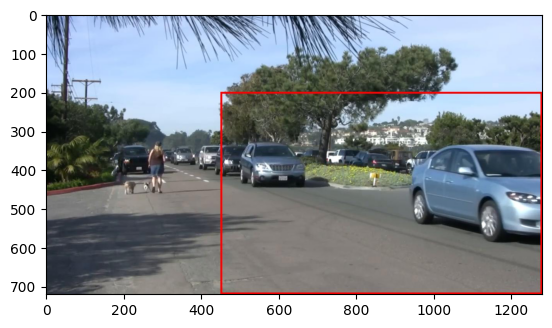

In [1]:


import csv
from pathlib import Path

import cv2
import imageio
import imageio_ffmpeg
import numpy as np
import onnxruntime as ort
import torch
import os
import torchvision.transforms as T
from PIL import Image
from sparrow_datums import BoxTracking
from tqdm import tqdm
from torch.utils.data import DataLoader
from speed_trapv3.detection.dataset import RetinaNetDataset
from speed_trapv3.utils import Holdout
import matplotlib.pyplot as plt
from speed_trapv3.detection.model import RetinaNet
from speed_trapv3.detection.config import Config
import matplotlib.pyplot as plt
data = RetinaNetDataset(Holdout.DEV)
dataloader = DataLoader(data, batch_size=1, shuffle=False)
count = 0
for batch in iter(dataloader):
    x = batch['image']
    x = x.cuda()
    bbx = batch['boxes'].detach().cpu().numpy()[0]
    print(bbx, count)
    transform = T.ToPILImage()
    img = np.array(transform(x[0]))
    plt.imshow(img)
    # img = cv2.circle(img, (int(keypoints[0][0]), int(keypoints[0][1])), radius=10, color=(0, 0, 255), thickness=-1) #Blue: Backtire
    # img = cv2.circle(img, (int(keypoints[1][0]), int(keypoints[1][1])), radius=10, color=(255, 0, 0), thickness=-1) #Red Front tire
    save_path = '/code/data/datasets/temp_imgs'
    count += 1
    # filename = batch['annotation_path'][0].split("/")[-1] + ".jpg"
    # cv2.imwrite(os.path.join(save_path, filename), img)
